Natural Language Processing
Review Data from Airbnb

In [82]:
#Read in libraries
import pandas as pd
import swifter
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import sklearn

In [83]:
#Settings for notebook
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

In [84]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
reviews = pd.read_csv(path + '/01_10_2020_Reviews_Processed_Text_Analysis.csv',sep=',',
                 parse_dates=['date'])

In [85]:
reviews.head().T

,0,1,2,3,4
comments,This a jewel in the DogpatchPotrero area Super easy and prompt communication If driving easy access to the 101 and 280 as an added bonus Much recommended,Megs place is sparkling clean and in an awesome location Meg is also very friendly and so does the dog shes so sweet,We had a great time in SF and loved staying at this home Marjorie was most helpful and informative about getting around and using public transportation It was very easy and we didnt feel far from all the city attractions The accommodation was comfortable and very nice I would stay there again and recommend it to friends and family Thanks so much,Very cozy place with the beach literally right across the street Very clean Would definitely stay again,Kevin is very professional prompt and warmhearted individual He gave us a lot of good tips traveling the city Definitely five stars
date,2016-01-26 00:00:00,2019-03-08 00:00:00,2015-08-16 00:00:00,2018-10-17 00:00:00,2018-01-10 00:00:00
id_review,60697388,421167935,42860595,337874233,226453615
listing_id,288213,10427768,4269254,4252808,1393654
reviewer_id,308818,32888504,35391497,76550363,133118406
reviewer_name,Desigan,家惠,Hallie,Patrick,Daniel
host_is_superhost,True,True,True,True,True
host_response_time,within an hour,within an hour,within an hour,within an hour,within an hour
latitude,37.7597,37.7736,37.783,37.7573,37.7524
longitude,-122.388,-122.426,-122.432,-122.509,-122.459


Histogram of sentiment scores

Text(0.5, 1.0, 'Compound')

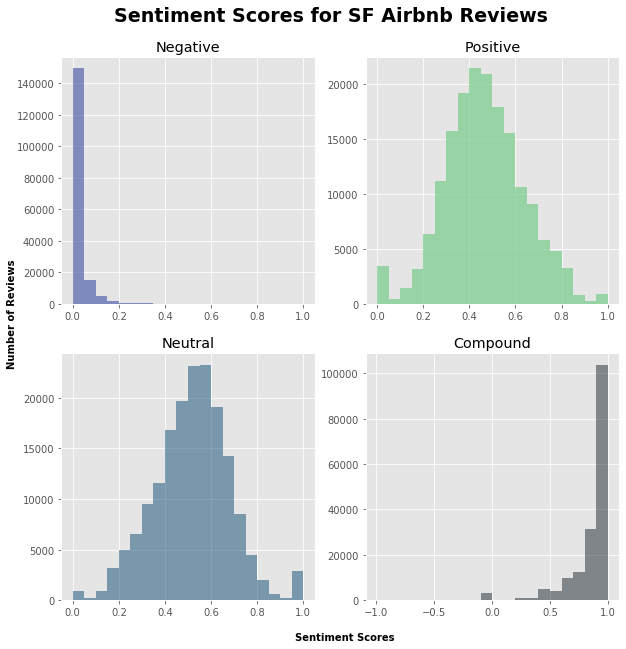

In [86]:
#Set style 
plt.style.use('ggplot')

#Set plot
fig, ax = plt.subplots(2,2, figsize = (10,10))

fig.suptitle('Sentiment Scores for SF Airbnb Reviews',fontsize =19,fontweight = 'bold', y =.95)
fig.text(.45,.07, 'Sentiment Scores', fontweight='bold')
fig.text(.05,.45, 'Number of Reviews', fontweight='bold', rotation = 'vertical')

#Plot 4 histograms
ax1 = reviews.sentiment_neg.hist(ax = ax[0,0],bins = 20, color = '#5f6caf', alpha = .75)
ax1.set_title("Negative")

ax2 = reviews.sentiment_pos.hist(ax = ax[0,1],bins = 20, color = '#7fcd91',alpha = .75)
ax2.set_title("Positive")

ax3 = reviews.sentiment_neu.hist(ax = ax[1,0],bins = 20, color = '#0f4c75',alpha = .5)
ax3.set_title("Neutral")

ax4 = reviews.sentiment_compound.hist(ax = ax[1,1],bins = 20, color = '#1b262c',alpha = .5)
ax4.set_title("Compound")


In [87]:
#Statistics in reference to sentiment scores
percentiles = reviews['sentiment_compound'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

count    172459.000000
mean          0.847324
std           0.216315
min          -0.993800
10%           0.624900
20%           0.784500
30%           0.855500
40%           0.899900
50%           0.926900
60%           0.946000
70%           0.960100
80%           0.971900
90%           0.982100
max           0.999300
Name: sentiment_compound, dtype: float64

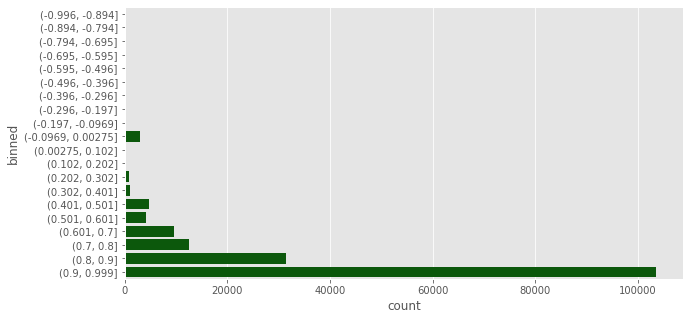

In [88]:
#split sentiment_compound scores into 20 bins
reviews['binned'] = pd.cut(reviews.sentiment_compound, bins = 20)

#Set fig size
fig, ax = plt.subplots(figsize = (10,5))

#Plot data
ax = sns.countplot(y = 'binned',data = reviews, ax=ax, color = 'darkgreen')




Our reviews are very positive. 
Let's compare the differences between the very positive comments and the very negative ones

## Differences in review length

In [89]:
reviews['comments_length'] = reviews.comments_parsed.apply(len)

positive_reviews = reviews[reviews.sentiment_compound > .99]
negative_reviews = reviews[reviews.sentiment_compound < -.5]

Text(0.5, 0, 'Characters')

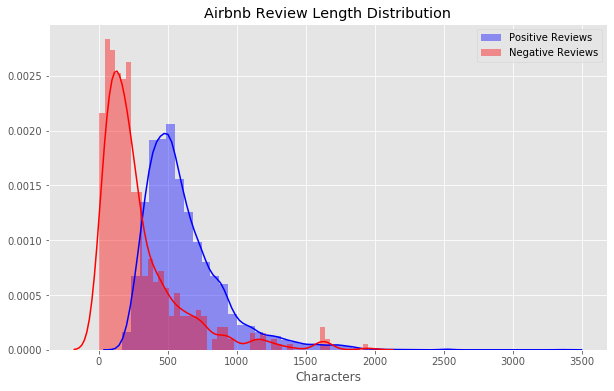

In [90]:
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histogram
sns.distplot(positive_reviews.comments_length, kde = True, bins = 50, color = 'b')
sns.distplot(negative_reviews.comments_length, kde = True, bins = 50, color = 'r')

plt.legend(labels = ['Positive Reviews', 'Negative Reviews'], frameon = True);
ax.set_title('Airbnb Review Length Distribution')
ax.set_xlabel('Characters')

Let's look at a subset of some of these reviews

Postive Reviews

In [91]:
#Positive reviews
positive_reviews.comments[10:15]

228    When I was seeking a place to stay in San Francisco I looked for an Airbnb lodging that had a good location that was spacious enough to be comfortable The place had to be clean and listed at a fair market price so as not to blow my budget All my requirements were met at 78 Milton Street in the Glen Park area of San Francisco The website photos and descriptions appeared to fit my needs I was not disappointed In fact the setting exceeded my expectations for many reasons The location was in a suburban neighborhood which was very quiet at night for perfect sleeping The main room was more than spacious enough for me as a single but certainly would accommodate a couple comfortably The room was decorated in soft colors with 3 main areas the bar the desk area and the bed There was wet bar area that had a sink small refrigerator and eating area perfect for quick meals The desk area was spacious with 3 chairs and a microwave In addition there were choices of interesting books to read abou

Word Clouds


In [92]:
#Positive Word Cloud

In [93]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


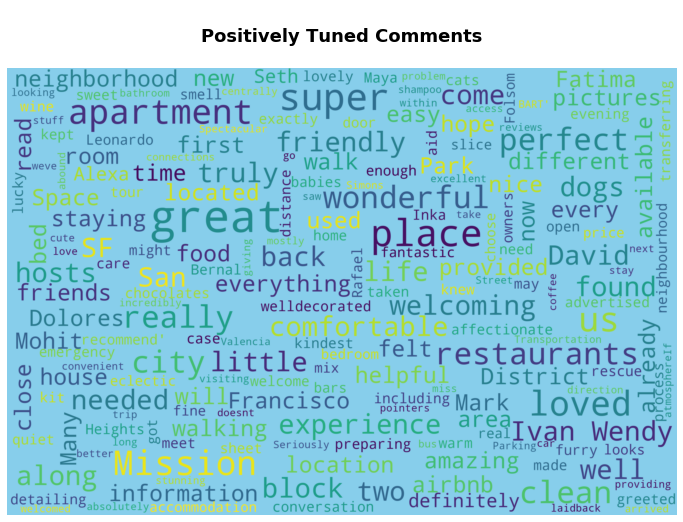

In [94]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="skyblue",
                      width= 3000, height = 2000).generate(str(positive_reviews.comments.values))

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()
    
plot_wordcloud(wordcloud, '\nPositively Tuned')

In [95]:
#What are the most popular words in positive reviews?

In [96]:
#Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english').fit(positive_reviews.comments)

print('Vocabulary used in positive reviews: {}'.format(len(count.vocabulary_)))

bow = count.transform(positive_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in positive reviews: 16162


In [97]:
positive_words = pd.DataFrame(words_freq, columns =['Word', 'Count']) 


Text(0, 0.5, '')

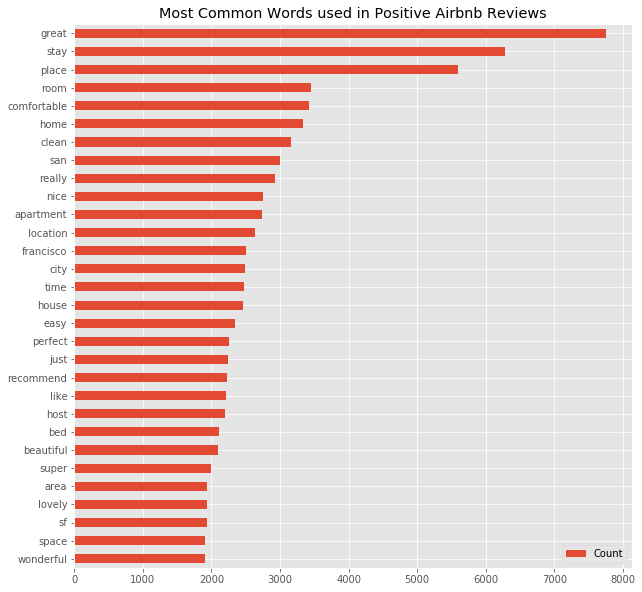

In [98]:
positive_words = positive_words.head(30)

fig,ax = plt.subplots(figsize = (10,10))
positive_words.sort_values(by='Count').plot(x = 'Word',y='Count',kind='barh', ax=ax)

ax.set_title('Most Common Words used in Positive Airbnb Reviews')
ax.set_ylabel('')

In [99]:
#Topic modeling and document clustering for postive reviews

In [100]:
#Import libraries
import gensim
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Phrases
from gensim import corpora, models, similarities

In [101]:
#Apply preprocess and stem original comments
docs = np.array(positive_reviews['comments'].apply(preprocess_string))

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [102]:
#Create dictionary of tokens and print info
dictionary = corpora.Dictionary(docs)
print('Number of unique words in original documents: {}'.format(len(dictionary)))

Number of unique words in original documents: 12508


**Remove rare or common tokens**

In [103]:
#Filter words that occur in less than 10 documents or more than 25% of documents
dictionary.filter_extremes(no_below= 10,no_above=.25 )

print('Number of unique words after removing rare and common words: {}'.format(len(dictionary)))

Number of unique words after removing rare and common words: 3320


In [104]:
#Vectorize data
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [105]:
#Initialize Tfidf and fit to corpus
tfidf = models.TfidfModel(corpus)

#Scale and transform corpus
transformed_tfidf = tfidf[corpus]

#Fit transformed data to Lda
lda = models.LdaMulticore(corpus= transformed_tfidf, num_topics=10, id2word=dictionary)

In [106]:
#Import pyLDAvis to visualize topics found in LDA
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

#Create plot
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.001229 -0.009285       1        1  18.236061
4     -0.001970 -0.004691       2        1  13.577808
1     -0.002443 -0.006832       3        1  13.214199
3      0.000335  0.002704       4        1  11.793525
0      0.003139 -0.011456       5        1  10.952503
9     -0.004545 -0.011189       6        1  10.551936
7      0.006310  0.006928       7        1   7.398570
6      0.016230  0.030958       8        1   5.471541
8      0.017702 -0.009825       9        1   4.927889
5     -0.033529  0.012688      10        1   3.875967, topic_info=    Category         Freq               Term        Total  loglift  logprob
324  Default  1614.000000   highli_recommend  1614.000000  30.0000  30.0000
129  Default   499.000000        best_airbnb   499.000000  29.0000  29.0000
562  Default  1138.000000        golden_gate  1138.000000  28.0000  28.0000
85   Default   460.000000        warm_welcom   460.000000  27.0000  27.0000
676  Default  1032.000000  definit_recommend  1032.000000  26.0000  26.0000
..       ...          ...                ...          ...      ...      ...
245  Topic10    25.033211              night   632.889648   0.0203  -6.3133
50   Topic10    24.845516               felt   615.001953   0.0414  -6.3208
383  Topic10    25.527054               good   742.200439  -0.1195  -6.2937
167  Topic10    24.867859                lot   660.757507  -0.0294  -6.3199
332  Topic10    25.326660          live_room   795.867188  -0.1972  -6.3016

[777 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3095      1  0.093146  abhai
3095      2  0.074517  abhai
3095      3  0.018629  abhai
3095      4  0.074517  abhai
3095      5  0.018629  abhai
...     ...       ...    ...
2518      6  0.040870   zero
2518      7  0.081741   zero
2518      8  0.040870   zero
2518      9  0.081741   zero
2518     10  0.122611   zero

[5050 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1, 10, 8, 7, 9, 6])

**Takeaways**

## Negative Reviews

In [107]:
#Preview some of the negative reviews
negative_reviews.comments[10:15]

3019                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Do not book a room unless you like many homeless people and unsavory people in the area filthy dirty streets fear of being approached or mugged a real slum units are like prison rooms cost is too much the hotel should be bought by the city and turned into a homeless flop house
3333                                                                                                                                 

**Wordcloud of negative comments**

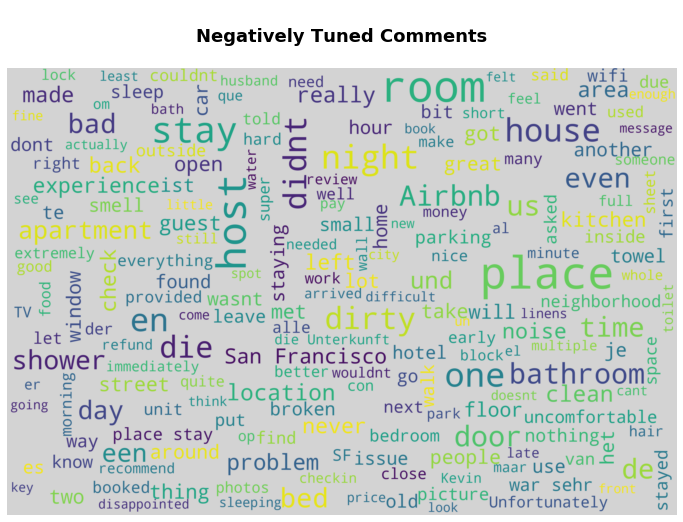

In [108]:
#Create wordcloud
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgray",
                      width= 3000, height = 2000).generate(str(negative_reviews.comments.values))

#Plot wordcloud
plot_wordcloud(wordcloud, '\nNegatively Tuned')

#What are the most popular words in negative reviews?

In [109]:
#Instantiate CountVectorizer and fit to comments
count = CountVectorizer(stop_words='english').fit(negative_reviews.comments)

#Print length of unique words in negative comments
print('Vocabulary used in negative reviews: {}'.format(len(count.vocabulary_)))

#Create bag of words from comments
bow = count.transform(negative_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in negative reviews: 4625


In [110]:
#Create df with vocab and their corresponding counts 
negative_words = pd.DataFrame(words_freq, columns =['Word', 'Count']) 

Text(0, 0.5, '')

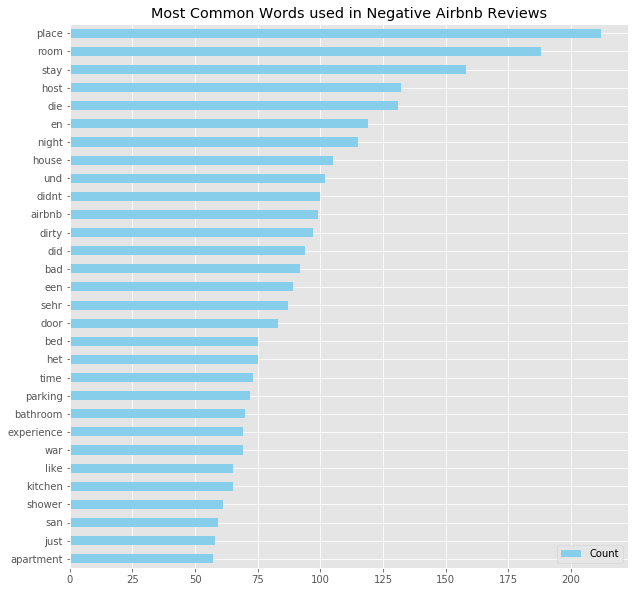

In [111]:
#Capture the 30 most used words
negative_words = negative_words.head(30)

#Plot
fig,ax = plt.subplots(figsize = (10,10))
negative_words.sort_values(by='Count').plot(x = 'Word',y='Count',kind='barh', ax=ax, color = 'skyblue')

#Set plot aesthetics
ax.set_title('Most Common Words used in Negative Airbnb Reviews')
ax.set_ylabel('')

In [112]:
#Topic modeling for negative reviews

In [113]:
#Apply preprocess and stem original comments
docs = np.array(negative_reviews['comments'].apply(preprocess_string))

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [114]:
#Create dictionary of tokens and print info
dictionary = corpora.Dictionary(docs)
print('Number of unique words in original documents: {}'.format(len(dictionary)))

Number of unique words in original documents: 3777


**Remove rare or common tokens**

In [115]:
#Filter words that occur in less than 10 documents or more than 25% of documents
dictionary.filter_extremes(no_below= 10,no_above=.25 )

print('Number of unique words after removing rare and common words: {}'.format(len(dictionary)))

Number of unique words after removing rare and common words: 344


In [116]:
#Vectorize data
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [117]:
#Initialize Tfidf and fit to corpus
tfidf = models.TfidfModel(corpus)

#Scale and transform corpus
transformed_tfidf = tfidf[corpus]

#Fit transformed data to Lda
lda = models.LdaMulticore(corpus= transformed_tfidf, num_topics=10, id2word=dictionary)

In [118]:
#Create plot
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.038322 -0.003087       1        1  20.946863
6     -0.049618 -0.013751       2        1  16.989737
4     -0.019521  0.060315       3        1  16.297766
3      0.086719  0.020820       4        1  14.827043
2     -0.003592  0.010181       5        1  10.221910
9      0.034589 -0.025718       6        1   5.226625
0     -0.000132 -0.041940       7        1   4.140470
7      0.021890  0.020891       8        1   3.999112
1      0.006841 -0.044691       9        1   3.888222
5     -0.038853  0.016979      10        1   3.462258, topic_info=    Category        Freq            Term       Total  loglift  logprob
6    Default   72.000000             sin   72.000000  30.0000  30.0000
196  Default   61.000000        war_sehr   61.000000  29.0000  29.0000
261  Default   62.000000             mui   62.000000  28.0000  28.0000
17   Default  130.000000             bad  130.000000  27.0000  27.0000
199  Default   48.000000  die_unterkunft   48.000000  26.0000  26.0000
..       ...         ...             ...         ...      ...      ...
261  Topic10    2.443148             mui   62.450054   0.1222  -4.9340
24   Topic10    2.376166             bed   56.651405   0.1918  -4.9618
134  Topic10    2.302521          airbnb   69.026588  -0.0372  -4.9933
17   Topic10    2.373412             bad  130.107773  -0.6408  -4.9630
42   Topic10    2.236353             die   73.639404  -0.1311  -5.0224

[526 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
304       1  0.292480     abl
304       2  0.146240     abl
304       3  0.073120     abl
304       4  0.146240     abl
304       8  0.073120     abl
...     ...       ...     ...
58        3  0.239577  zimmer
58        4  0.119788  zimmer
58        5  0.059894  zimmer
58        7  0.119788  zimmer
58        8  0.119788  zimmer

[2241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 4, 3, 10, 1, 8, 2, 6])

In [119]:
#what insights can you gain?